In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
dataset=pd.read_csv("C:/Users/56961/Desktop/Proyecto ML CEN/dataset.csv/dataset.csv",sep=";")

In [3]:
dataset.drop(["node"],inplace=True,axis=1)

In [4]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [6]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [7]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")

In [8]:
test=dataset.query("date.dt.year==2022")

In [9]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [10]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [11]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head(-5)

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069
...,...,...
2021-12-31 14:00:00,LOSALME,173.281029
2021-12-31 15:00:00,LOSALME,170.696485
2021-12-31 16:00:00,LOSALME,170.537953


In [12]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head(-5)

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176
...,...,...
2022-12-31 14:00:00,LOSALME,126.068562
2022-12-31 15:00:00,LOSALME,123.914380
2022-12-31 16:00:00,LOSALME,120.936187


In [13]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

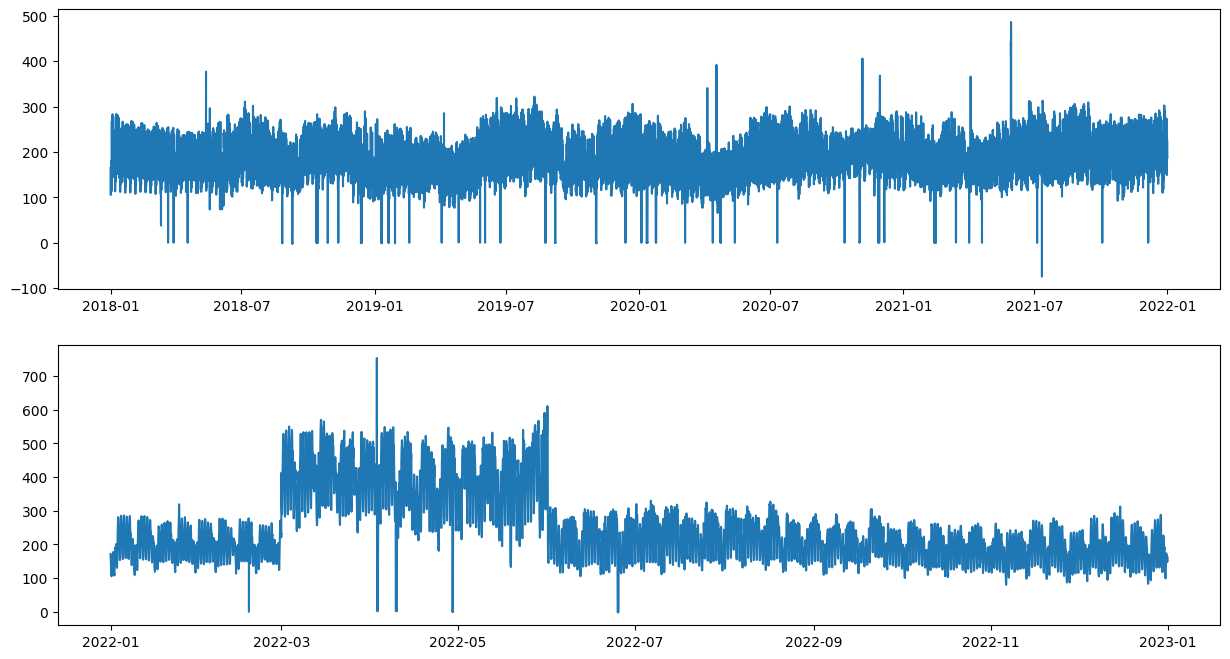

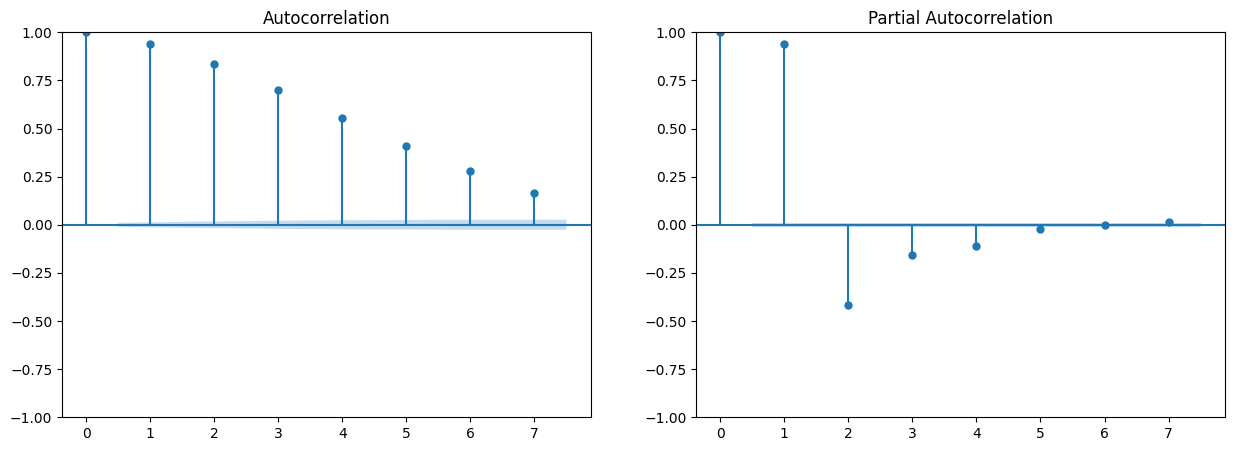

In [14]:
#Analisis estadistico de CHENA
subestacion="CHENA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

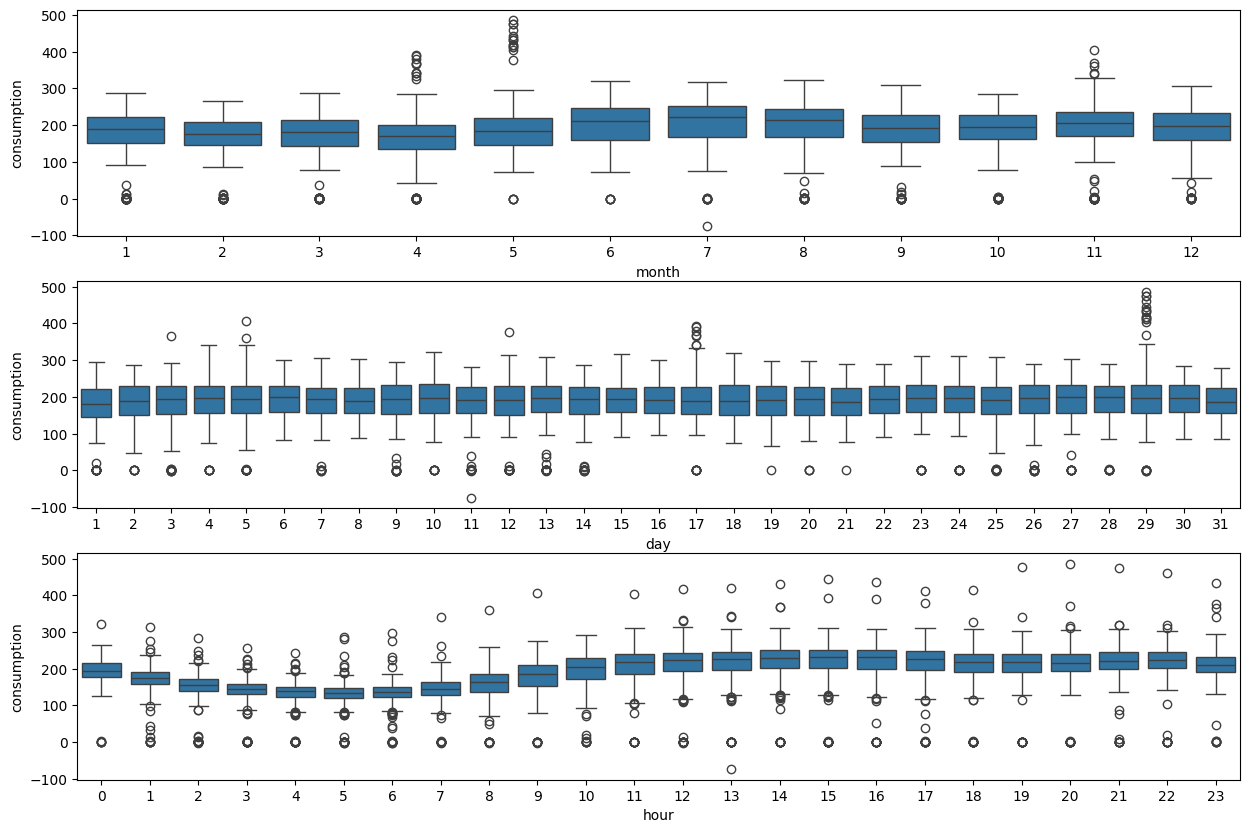

In [15]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [16]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


In [17]:
data.sample(20)

,consumption,date,day,hour,month,year
date,,,,,,
2019-10-26 04:00:00,131.800865,2019-10-26 04:00:00,26,4,10,2019
2019-01-17 20:00:00,198.277728,2019-01-17 20:00:00,17,20,1,2019
2018-04-16 05:00:00,126.716699,2018-04-16 05:00:00,16,5,4,2018
2021-10-26 12:00:00,246.880450,2021-10-26 12:00:00,26,12,10,2021
2018-12-01 10:00:00,169.450311,2018-12-01 10:00:00,1,10,12,2018
2020-11-01 11:00:00,1.090394,2020-11-01 11:00:00,1,11,11,2020
2021-10-19 18:00:00,252.396672,2021-10-19 18:00:00,19,18,10,2021
2021-11-30 00:00:00,216.117395,2021-11-30 00:00:00,30,0,11,2021
2018-04-03 17:00:00,247.806782,2018-04-03 17:00:00,3,17,4,2018


In [18]:
data_chena=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_chena.to_csv("data_chena.csv")

In [19]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_chena.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

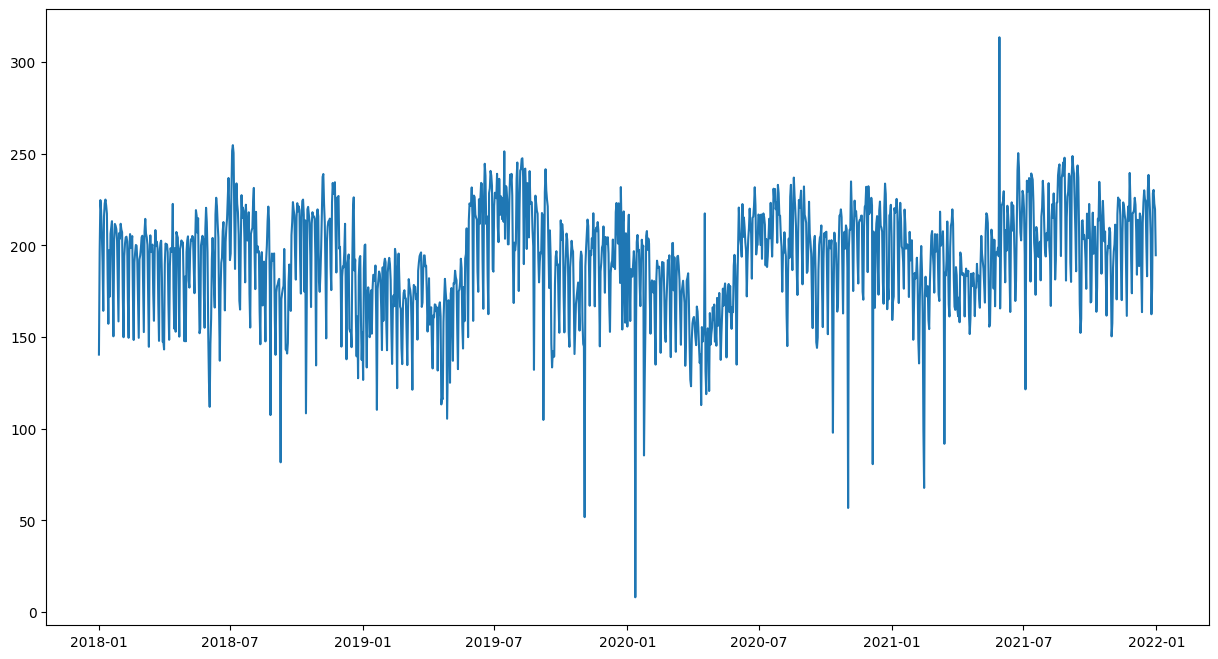

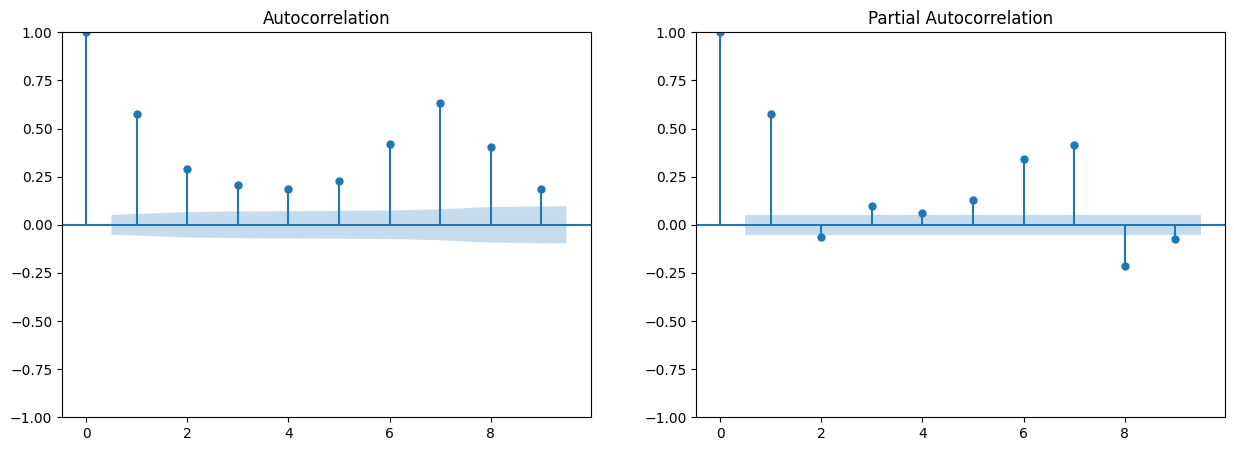

In [20]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# p value < 0,05, la serie es estacionaria.

ADF Statistic: -3.959352
p-value: 0.001639
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
import numpy as np

In [23]:
# Encontrar el mejor modelo ARIMA
modelo_auto = auto_arima(ys, seasonal=False, trace=True)

# Obtener los términos óptimos del modelo ARIMA
best_order = modelo_auto.get_params()['order']

# Ajustar el modelo ARIMA con los términos óptimos
modelo_buin_arima = ARIMA(ys, order=best_order)
m_ad1 = modelo_buin_arima.fit()

# Calcular el error cuadrático medio
mse = m_ad1.mse

# Calcular el criterio de información de Akaike (AIC)
aic = m_ad1.aic

# Realizar predicciones
ysp = m_ad1.predict()

# Calcular el error porcentual absoluto medio (MAPE)
mape = mean_absolute_percentage_error(ys, ysp)

# Imprimir las métricas de evaluación
print("MSE:", mse)
print("AIC:", aic)
print("MAPE:", mape)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13196.332, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13717.385, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13681.933, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13498.185, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13715.388, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13249.175, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13229.022, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13228.304, Time=2.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12990.447, Time=4.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13248.690, Time=1.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13073.290, Time=9.21 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=15.18 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13220.518, Time=10.86 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=27.82 sec
 ARIMA(2,1,3)(0,0,0)[0]     

c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE: 421.7636368834984
AIC: 12935.760868384396
MAPE: 0.0986921110014407


In [24]:
modelo_chena=ARIMA(ys,order=(2,1,3)) #Parametros escojidos segun auto_arima
m_ad1=modelo_chena.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE 421.7636368834984
AIC 12935.760868384396
MAPE 0.0986921110014407


In [25]:
modelo_chena=ARIMA(ys,order=(3,0,3)) #Parametros escojidos segun lo visto en clases
m_ad1=modelo_chena.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

c:\Users\56961\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE 402.4315734270798
AIC 12923.521328439288
MAPE 0.09690336207440393


El MAPE sugiere que el modelo tiene un buen rendimiento,  las predicciones estan bastante cerca de los valores reales en promedio

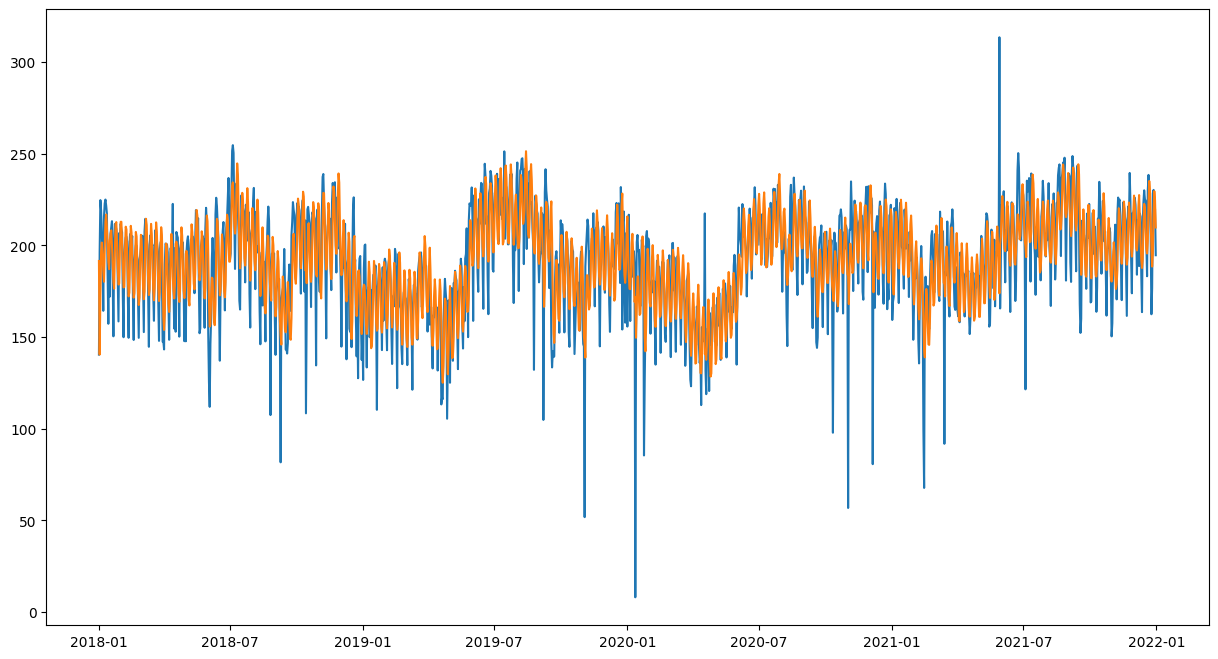

In [26]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [27]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [28]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [29]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [30]:
seed=16011996
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [31]:
model_chena = Sequential()
model_chena.add(Input(name="serie",shape=(8,1)))
model_chena.add(SimpleRNN(256))
model_chena.add(Dense(128))
model_chena.add(Dense(1, activation='linear'))
model_chena.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
tag="rnn_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = 'logs\\fit\\' + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_chena.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_chena.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model_chena.save(log_dir+'\\model_chena_{0}.keras'.format(tag))


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 36291.2930 - mae: 188.2927 - mape: 97.9921 - mse: 36291.2930
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 28070.0371 - mae: 165.0503 - mape: 85.7188 - mse: 28070.0371
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 20832.1602 - mae: 141.4618 - mape: 73.3073 - mse: 20832.1602
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14283.3984 - mae: 116.0903 - mape: 60.0292 - mse: 14283.3984
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8760.2832 - mae: 89.3217 - mape: 46.0866 - mse: 8760.2832
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4627.7451 - mae: 62.5178 - mape: 32.2832 - mse: 4627.7451
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 2083.2075 - mae: 39.4407 - mape: 20.9038 - mse: 2083.2075
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 986.9573 - mae: 25.9127 - mape: 15.0901 - mse: 986.9573 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 817

#### Mejor rendimiento recurrente sin shuffle

batch 512

Epoch 198/200

3/3 [==============================] - 0s 43ms/step - loss: 249.3464 - mse: 249.3464 - mae: 10.5225 - mape: 7.3650

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


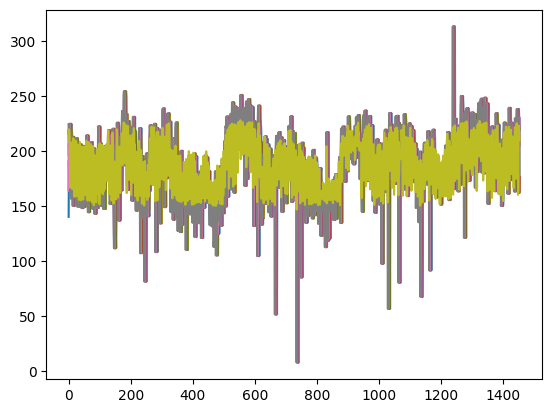

In [33]:
xw=[i for i in range(len(yw))]
yp=model_chena.predict(yw)
plt.plot(xw,yw,xw,yp)

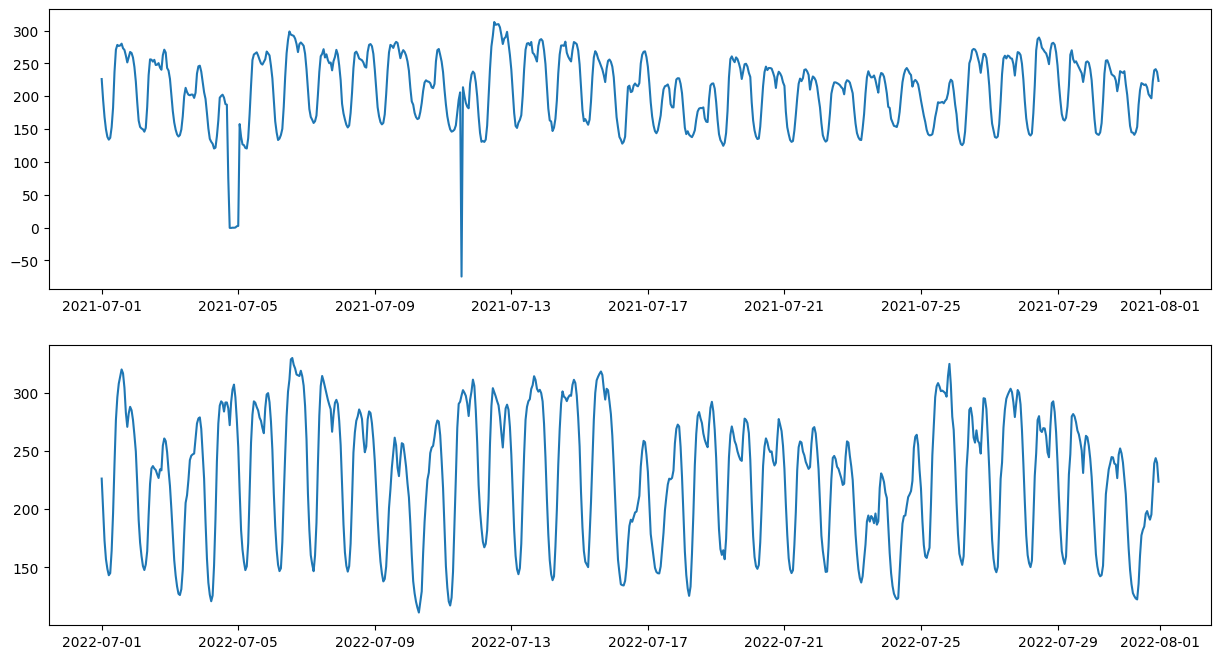

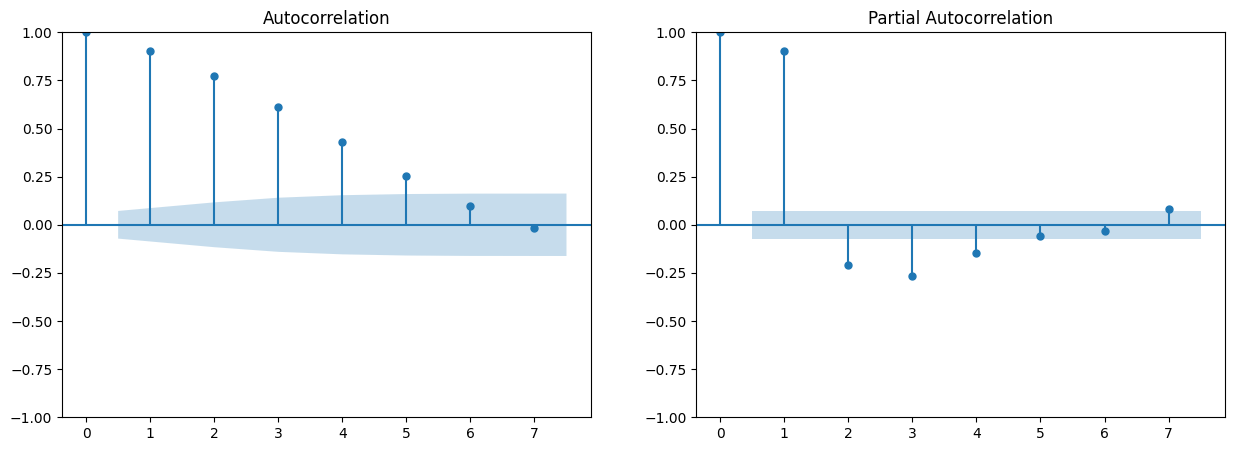

In [34]:
subestacion="CHENA"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==7".format(subestacion)
ym=ds_train.query(filtro)["consumption"]
xm=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==7".format(subestacion)
ytm=ds_test.query(filtro)["consumption"]
xtm=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(xm,ym);
axes[1].plot(xtm,ytm);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ym,lags=7,ax=axes[0]);
plot_pacf(ym,lags=7,method="ywm",ax=axes[1]);

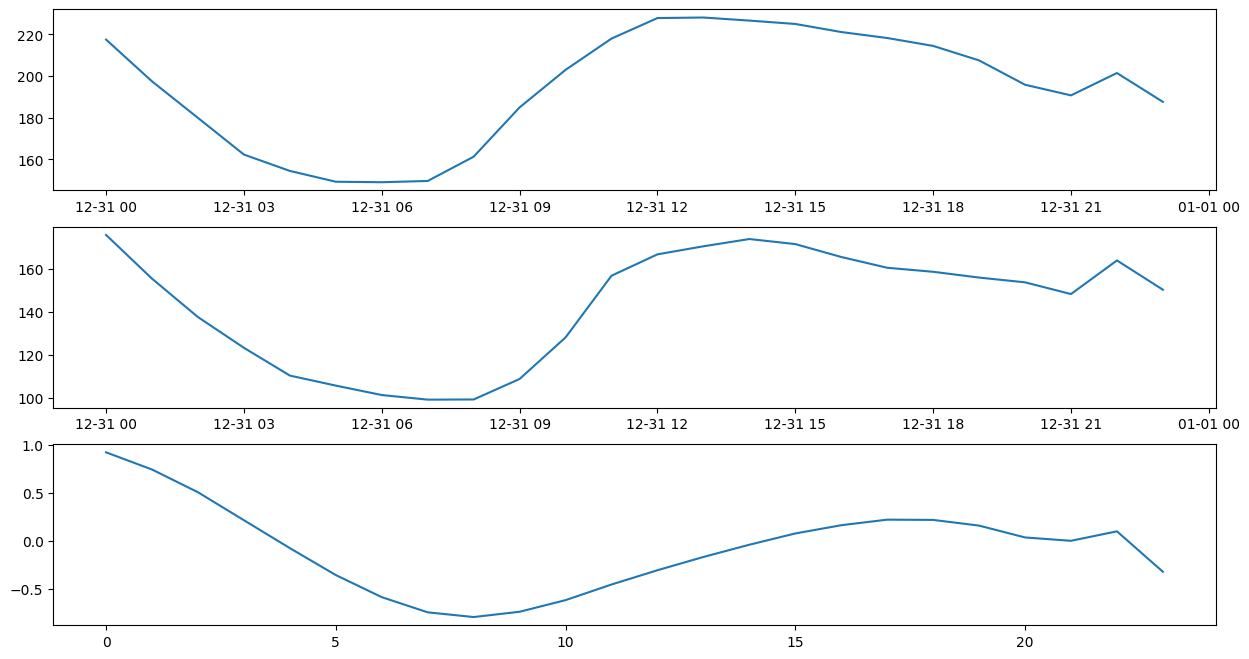

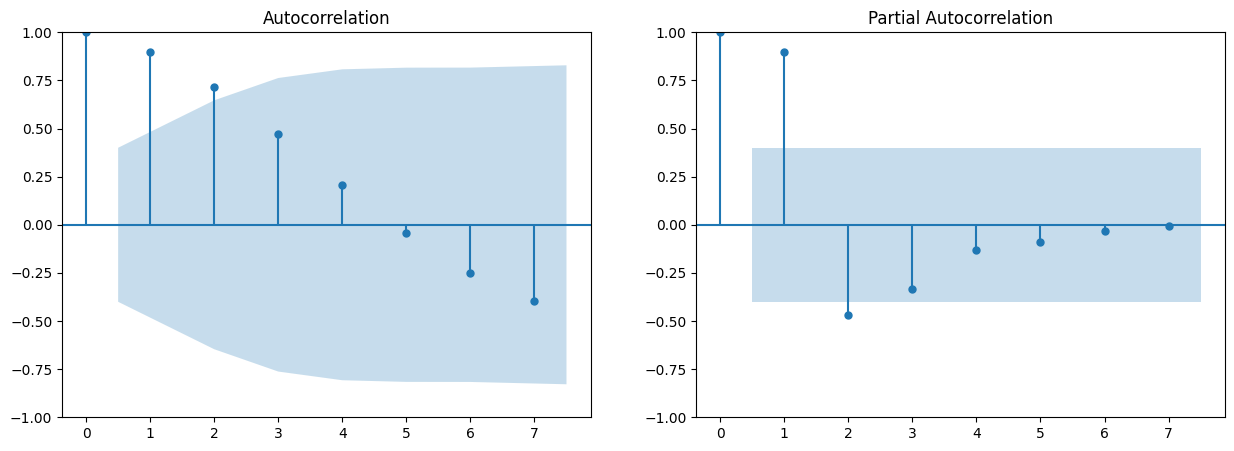

In [35]:
subestacion="CHENA"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==12 and date.dt.day==31".format(subestacion)
yd=ds_train.query(filtro)["consumption"]
xd=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==12 and date.dt.day==31".format(subestacion)
ytd=ds_test.query(filtro)["consumption"]
xtd=ds_test.query(filtro).index
c_yd_ytd=sm.tsa.stattools.ccf(yd, ytd);
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 8)
axes[0].plot(xd,yd);
axes[1].plot(xtd,ytd);
axes[2].plot(c_yd_ytd);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(yd,lags=7,ax=axes[0]);
plot_pacf(yd,lags=7,method="ywm",ax=axes[1]);

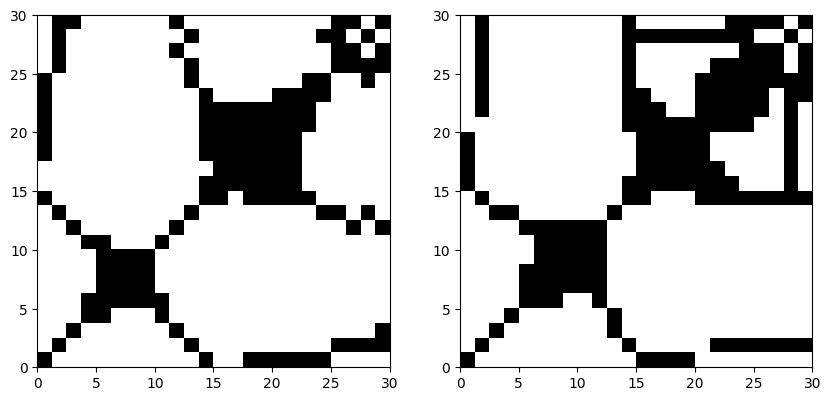

In [36]:
from pyts.image import RecurrencePlot

rp = RecurrencePlot(threshold=10)
y_rp = rp.transform(np.array([yd]))
yt_rp = rp.transform(np.array([ytd]))

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 5)
axes[0].imshow(y_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);
axes[1].imshow(yt_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);

In [37]:
model_chena_shuffle = Sequential()
model_chena_shuffle.add(Input(name="serie",shape=(8,1)))
model_chena_shuffle.add(SimpleRNN(256))
model_chena_shuffle.add(Dense(128))
model_chena_shuffle.add(Dense(1, activation='linear'))
model_chena_shuffle.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
tag="rnn_chena_shuffle"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs\\fit\\" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_chena_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_chena_shuffle.fit(yw, yt, batch_size=256, epochs=1000, shuffle=True ,verbose=1,callbacks=[tensorboard_callback])
model_chena_shuffle.save(log_dir+'\\model_chena_shuffle_{0}.keras'.format(tag))

Epoch 1/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 36109.3906 - mae: 187.7948 - mape: 97.7173 - mse: 36109.3906
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 27746.3066 - mae: 164.0674 - mape: 85.2001 - mse: 27746.3066
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 20576.9004 - mae: 140.5531 - mape: 72.8261 - mse: 20576.9004
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14134.5625 - mae: 115.4459 - mape: 59.6900 - mse: 14134.5625
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8674.8809 - mae: 88.8474 - mape: 45.8400 - mse: 8674.8809  
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4574.6699 - mae: 62.1035 - mape: 32.0725 - mse: 4574.6699
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2048.9111 - mae: 39.0719 - mape: 20.7333 - mse: 2048.9111
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 972.9512 - mae: 25.6982 - mape: 15.0163 - mse: 972.9512  
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

#### Mejor resultado recurrente shuffle True

Epoch 982/1000

6/6 [==============================] - 0s 21ms/step - loss: 6.3093 - mse: 6.3093 - mae: 1.7506 - mape: 0.9243

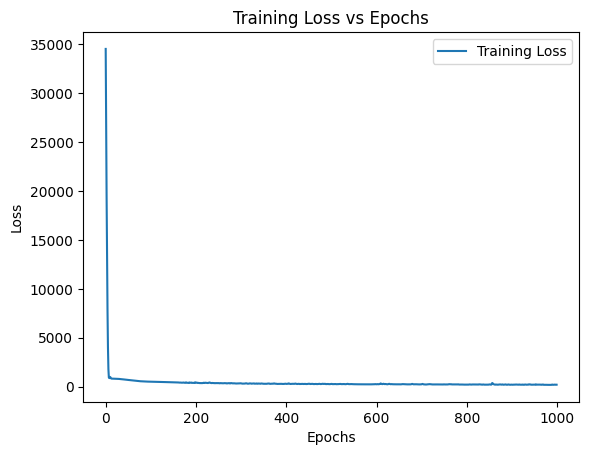

In [39]:
plt.plot(rnn.history['loss'], label='Training Loss')
plt.title('Training Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


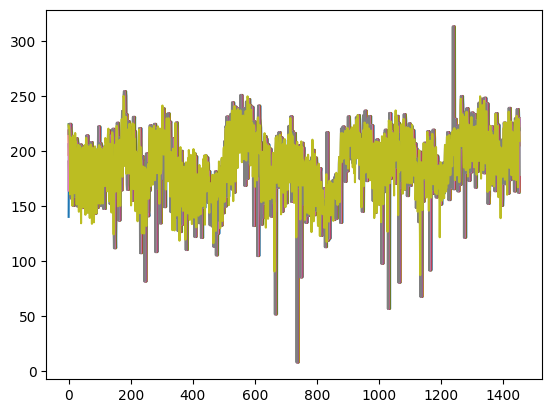

In [40]:
xw=[i for i in range(len(yw))]
yp=model_chena_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [41]:
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model

In [44]:
d=128
input=Input(name="activity",shape=(8,1))
attention= MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_chena=Model(inputs=input,outputs=output)
model_att_chena.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1024)      │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      1,025 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
tag="mhatt_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_chena.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_chena.fit(yw, yt, batch_size=256, epochs=200, shuffle=False, verbose=1,callbacks=[tensorboard_callback])
model_att_chena.save(log_dir+'/model_att_chena{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 31824.5020 - mae: 175.6377 - mape: 92.8165 - mse: 31824.5020
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8842.6836 - mae: 87.0230 - mape: 46.1946 - mse: 8842.6836   
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2238.8772 - mae: 37.0533 - mape: 23.2385 - mse: 2238.8772
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3178.2761 - mae: 48.7343 - mape: 29.8241 - mse: 3178.2761
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 824.2631 - mae: 23.7622 - mape: 14.2713 - mse: 824.2631
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1489.4844 - mae: 34.0673 - mape: 18.6934 - mse: 1489.4844
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 731.8386 - mae: 22.2058 - mape: 13.5701 - mse: 731.8386
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 809.2984 - mae: 19.8028 - mape: 13.5971 - mse: 809.2984
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 688.2866 - mae

### Mejor resultado
shuffle=False

rnn = model_att_chena.fit(yw, yt, batch_size=256, epochs=25, shuffle=False, verbose=1,callbacks=[tensorboard_callback])

Epoch 16/25

6/6 [==============================] - 0s 27ms/step - loss: 624.7125 - mse: 624.7125 - mae: 18.7557 - mape: 12.3557

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


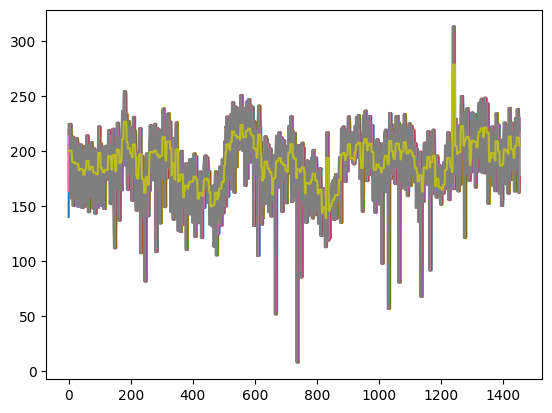

In [46]:
xw=[i for i in range(len(yw))]
yp=model_att_chena.predict(yw)
plt.plot(xw,yw,xw,yp)

In [47]:
d=128
input=Input(name="activity",shape=(8,1))
attention = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_chena_shuffle=Model(inputs=input,outputs=output)
model_att_chena_shuffle.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ activity            │ (None, 8, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 8, 1)      │        897 │ activity[0][0],   │
│ (MultiHeadAttentio… │                   │            │ activity[0][0],   │
│                     │                   │            │ activity[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 8, 128)    │        256 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1024)      │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │      1,025 │ flatten_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,178 (8.51 KB)

 Trainable params: 2,178 (8.51 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
tag="mhatt_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_chena_shuffle.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_chena_shuffle.fit(yw, yt, batch_size=256, epochs=200, shuffle=True, verbose=1,callbacks=[tensorboard_callback])
model_att_chena_shuffle.save(log_dir+'/model_att_chena{0}.keras'.format(tag))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 38736.5117 - mae: 194.5102 - mape: 101.3159 - mse: 38736.5117
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24086.0605 - mae: 152.0671 - mape: 78.9993 - mse: 24086.0605
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5605.8579 - mae: 67.1925 - mape: 35.3893 - mse: 5605.8579
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3018.9363 - mae: 46.5898 - mape: 28.1832 - mse: 3018.9363
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2583.3569 - mae: 43.0065 - mape: 25.9201 - mse: 2583.3569
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 891.9328 - mae: 25.3273 - mape: 14.4911 - mse: 891.9328
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1509.6010 - mae: 34.4474 - mape: 18.6656 - mse: 1509.6010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 689.1793 - mae: 21.1111 - mape: 12.8838 - mse: 689.1793
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 781.1483 - 

#### Mejor resultado att chena shuffle 

Epoch 22/25
6/6 [==============================] - 0s 29ms/step - loss: 626.5667 - mse: 626.5667 - mae: 18.7741 - mape: 12.3667

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


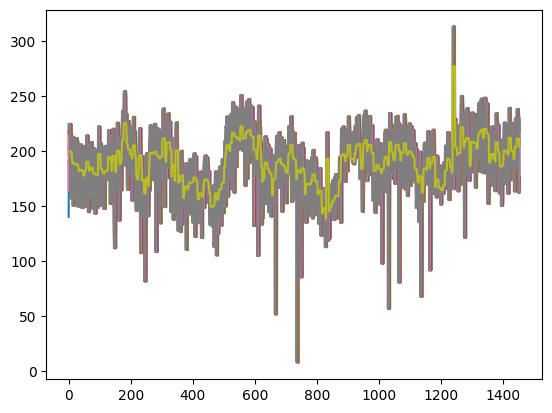

In [49]:
xw=[i for i in range(len(yw))]
yp=model_att_chena_shuffle.predict(yw)
plt.plot(xw,yw,xw,yp)

In [50]:
yw.shape

(1453, 8)

In [51]:
attention_output,attention_scores=model_att_chena.layers[1](yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                return_attention_scores=True)

In [52]:
attention_scores.shape

TensorShape([1, 1, 8, 8])

In [53]:
attention_output.shape

TensorShape([1, 8, 1])

In [54]:
import seaborn as sb

In [55]:
timesteps = ["t"+str(i) for i in range(8)]
timesteps.reverse()

In [56]:
timesteps

['t7', 't6', 't5', 't4', 't3', 't2', 't1', 't0']

<Axes: >

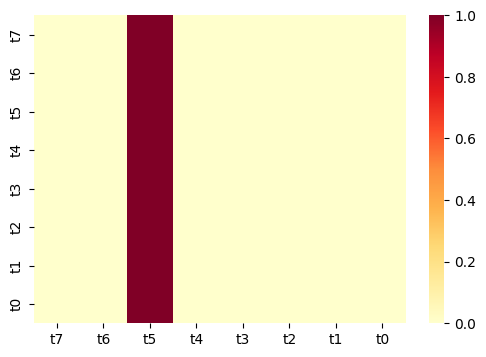

In [57]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [58]:
W=model_att_chena.layers[1].get_weights()

In [59]:
len(W)

8

In [60]:
componentes=["query","query_bias","key","key_bias","value","value_bias",
             "projection","projection"]
for name, out in zip(componentes,W):
    print(name, out.shape)

query (1, 1, 128)
query_bias (1, 128)
key (1, 1, 128)
key_bias (1, 128)
value (1, 1, 128)
value_bias (1, 128)
projection (1, 128, 1)
projection (1,)


In [ ]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_chena_2=Model(inputs=input,outputs=output)
model_att_chena_2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 wq (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wv (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wk (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                            

In [ ]:
tag="att_chena_2_"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_chena_2.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_chena_2.fit(yw, yt, batch_size=256, shuffle=True, epochs=50,verbose=1,callbacks=[tensorboard_callback])
model_att_chena_2.save(log_dir+'/model_att_chena_2_{0}.keras'.format(tag))

Epoch 1/50
6/6 [==============================] - 1s 21ms/step - loss: 1231.4617 - mse: 1231.4617 - mae: 28.5593 - mape: 17.1711
Epoch 2/50
6/6 [==============================] - 0s 22ms/step - loss: 830.3961 - mse: 830.3961 - mae: 21.0371 - mape: 13.8862
Epoch 3/50
6/6 [==============================] - 0s 22ms/step - loss: 703.5140 - mse: 703.5140 - mae: 21.2346 - mape: 13.1363
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 666.1528 - mse: 666.1528 - mae: 18.8236 - mape: 12.6014
Epoch 5/50
6/6 [==============================] - 0s 22ms/step - loss: 644.4891 - mse: 644.4891 - mae: 19.9577 - mape: 12.6722
Epoch 6/50
6/6 [==============================] - 0s 21ms/step - loss: 639.6425 - mse: 639.6425 - mae: 18.6765 - mape: 12.4157
Epoch 7/50
6/6 [==============================] - 0s 22ms/step - loss: 627.4504 - mse: 627.4504 - mae: 19.3830 - mape: 12.4840
Epoch 8/50
6/6 [==============================] - 0s 21ms/step - loss: 622.7900 - mse: 622.7900 - mae: 18.949

Mejor resultado Chena attention
Shffle = True
rnn = model_att_chena_2.fit(yw, yt, batch_size=256, shuffle=True, epochs=50,verbose=1,callbacks=[tensorboard_callback])

Epoch 32/50
6/6 [==============================] - 0s 22ms/step - loss: 743.4833 - mse: 743.4833 - mae: 20.8123 - mape: 13.5831

46/46 [==============================] - 0s 2ms/step


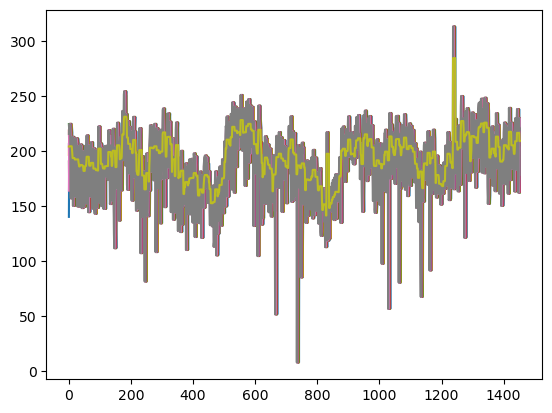

In [ ]:
xw=[i for i in range(len(yw))]
yp=model_att_chena_2.predict(yw)
plt.plot(xw,yw,xw,yp)

In [ ]:
attention_output,attention_scores=model_att_chena_2.layers[4]([yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1),
                yw[:1].reshape(1,8,1)],
                return_attention_scores=True)

<Axes: >

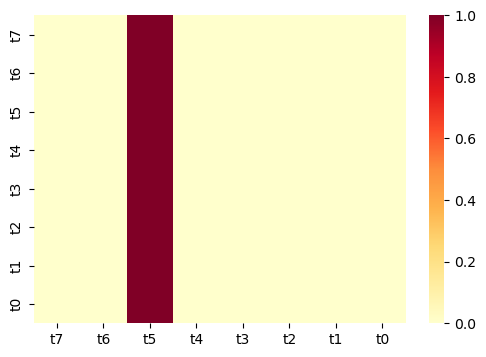

In [ ]:
xticklb = timesteps
yticklb = timesteps
figure, axis = plt.subplots(1, 1)
figure.set_figheight(4)
figure.set_figwidth(6)
att=attention_scores[0,:,:]
sb.heatmap(att, xticklabels=xticklb, yticklabels=yticklb, cmap="YlOrRd",ax=axis)

In [ ]:
attention_output.shape

TensorShape([1, 8, 1])

In [ ]:
attention_scores.shape

TensorShape([1, 8, 8])

In [ ]:
yw.shape

(1453, 8)

In [ ]:
W=model_att_chena_2.layers[5].get_weights()
for i in range(len(W)):
    print(i,"=",W[i].shape)

0 = (128, 128)
1 = (128,)
